In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sdss.metadata import MetaData
meta = MetaData()
%matplotlib inline

In [2]:
meta_data_directory = "/home/edgar/spectra/0_01_z_0_5_4_0_snr_inf"
scores_directory = f"{meta_data_directory}/bin_04/explanation/256_128_64/latent_12"
wave = np.load(f"{meta_data_directory}/wave.npy")

In [3]:
scores_names = {
    "correlation": "Correlation score",
    "correlation_filter_250kms": "Correlation score with a 250 kms filter",
    "cosine": "Cosine disimilarity score",
    "cosine_filter_250kms": "Cosine disimilarity score with a 250 kms filter",
    "lp_noRel100": "lp score",
    "lp_filter_250kms_noRel100": "lp score with a 250 kms filter",
    "lp_noRel97": "lp score ignoring 3% of largest residuals",
    "lp_filter_250kms_noRel97": "lp score ignoring 3% of largest residuals with a 250 kms filter",
    "lp_rel100": "lp relative score",
    "lp_filter_250kms_rel100": "lp relative score with a 250 kms filter",
    "lp_rel97": "lp relative score\n ignoring 3% of largest residuals",
    "lp_filter_250kms_rel97": "lp relative score ignoring 3% of largest residuals with a 250 kms filter",
    # "mse_noRel100": "MSE score",
    # "mse_filter_250kms_noRel100": "MSE score with a 250 kms filter",
    # "mse_noRel97": "MSE score ignoring 3% of largest residuals",
    # "mse_filter_250kms_noRel97": "MSE score ignoring 3% of largest residuals with a 250 kms filter",
    # "mse_rel100": "MSE relative score",
    # "mse_filter_250kms_rel100": "MSE relative score with a 250 kms filter",
    # "mse_rel97": "MSE relative score\n ignoring 3% of largest residuals",
    # "mse_filter_250kms_rel97": "MSE relative score ignoring 3% of largest residuals with a 250 kms filter"

}
scores = {}
df_scores = {}

for metric in scores_names.keys():
    
    scores[metric] = np.load(
        f"{scores_directory}/{metric}/top_anomalies.npy",
        mmap_mode="r"
    )

    df_scores[metric] = pd.read_csv(
        f"{scores_directory}/{metric}/top_anomalies.csv.gz",
        index_col="specobjid",
    )

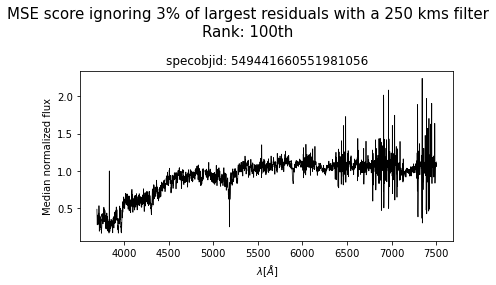

In [4]:
rank = -100
# metric = "cosine_filter_250kms"
save_to = "/home/edgar/explain-me-why/sections/figures/score/lunch"
# fig, ax = plt.subplots(figsize=(20, 10), tight_layout=True)
fig, ax = plt.subplots(tight_layout=True)

for metric in scores_names.keys():
    
    specobjid = df_scores[metric].index[rank]

    ax.clear()

    fig.suptitle(f"{scores_names[metric]}\nRank: {abs(rank)}th", fontsize=15)
    ax.title.set_text(f"specobjid: {specobjid}")

    ax.set_xlabel("$\lambda [\AA]$")
    ax.set_ylabel("Median normalized flux")

    ax.plot(
        wave, scores[metric][rank],
        color="black", #label=f"specobjid: {specobjid}"
        lw=0.75
    )
    plot_name = f"rank_{abs(rank)}_{metric}"
    # fig.savefig(f"{save_to}/{plot_name}.png")
    fig.savefig(f"{save_to}/{plot_name}.pdf")